# Bike Sharing Dataset ( Hourly basis)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import StandardScaler
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor
from sklearn.metrics            import r2_score
from sklearn.metrics            import mean_squared_error
from sklearn.model_selection    import GridSearchCV


### Reading Data

In [2]:
hour=pd.read_csv('hour.csv')

In [3]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Droping irrelevent columns

In [4]:
hour.drop(['instant','dteday','casual','mnth','registered'],axis=1,inplace=True)

In [5]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB


In [6]:
hour.isna().sum()

season        0
yr            0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

- Data have no null values
- Data is already normalized

#### Analzing more from data

In [7]:
hour.describe()

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


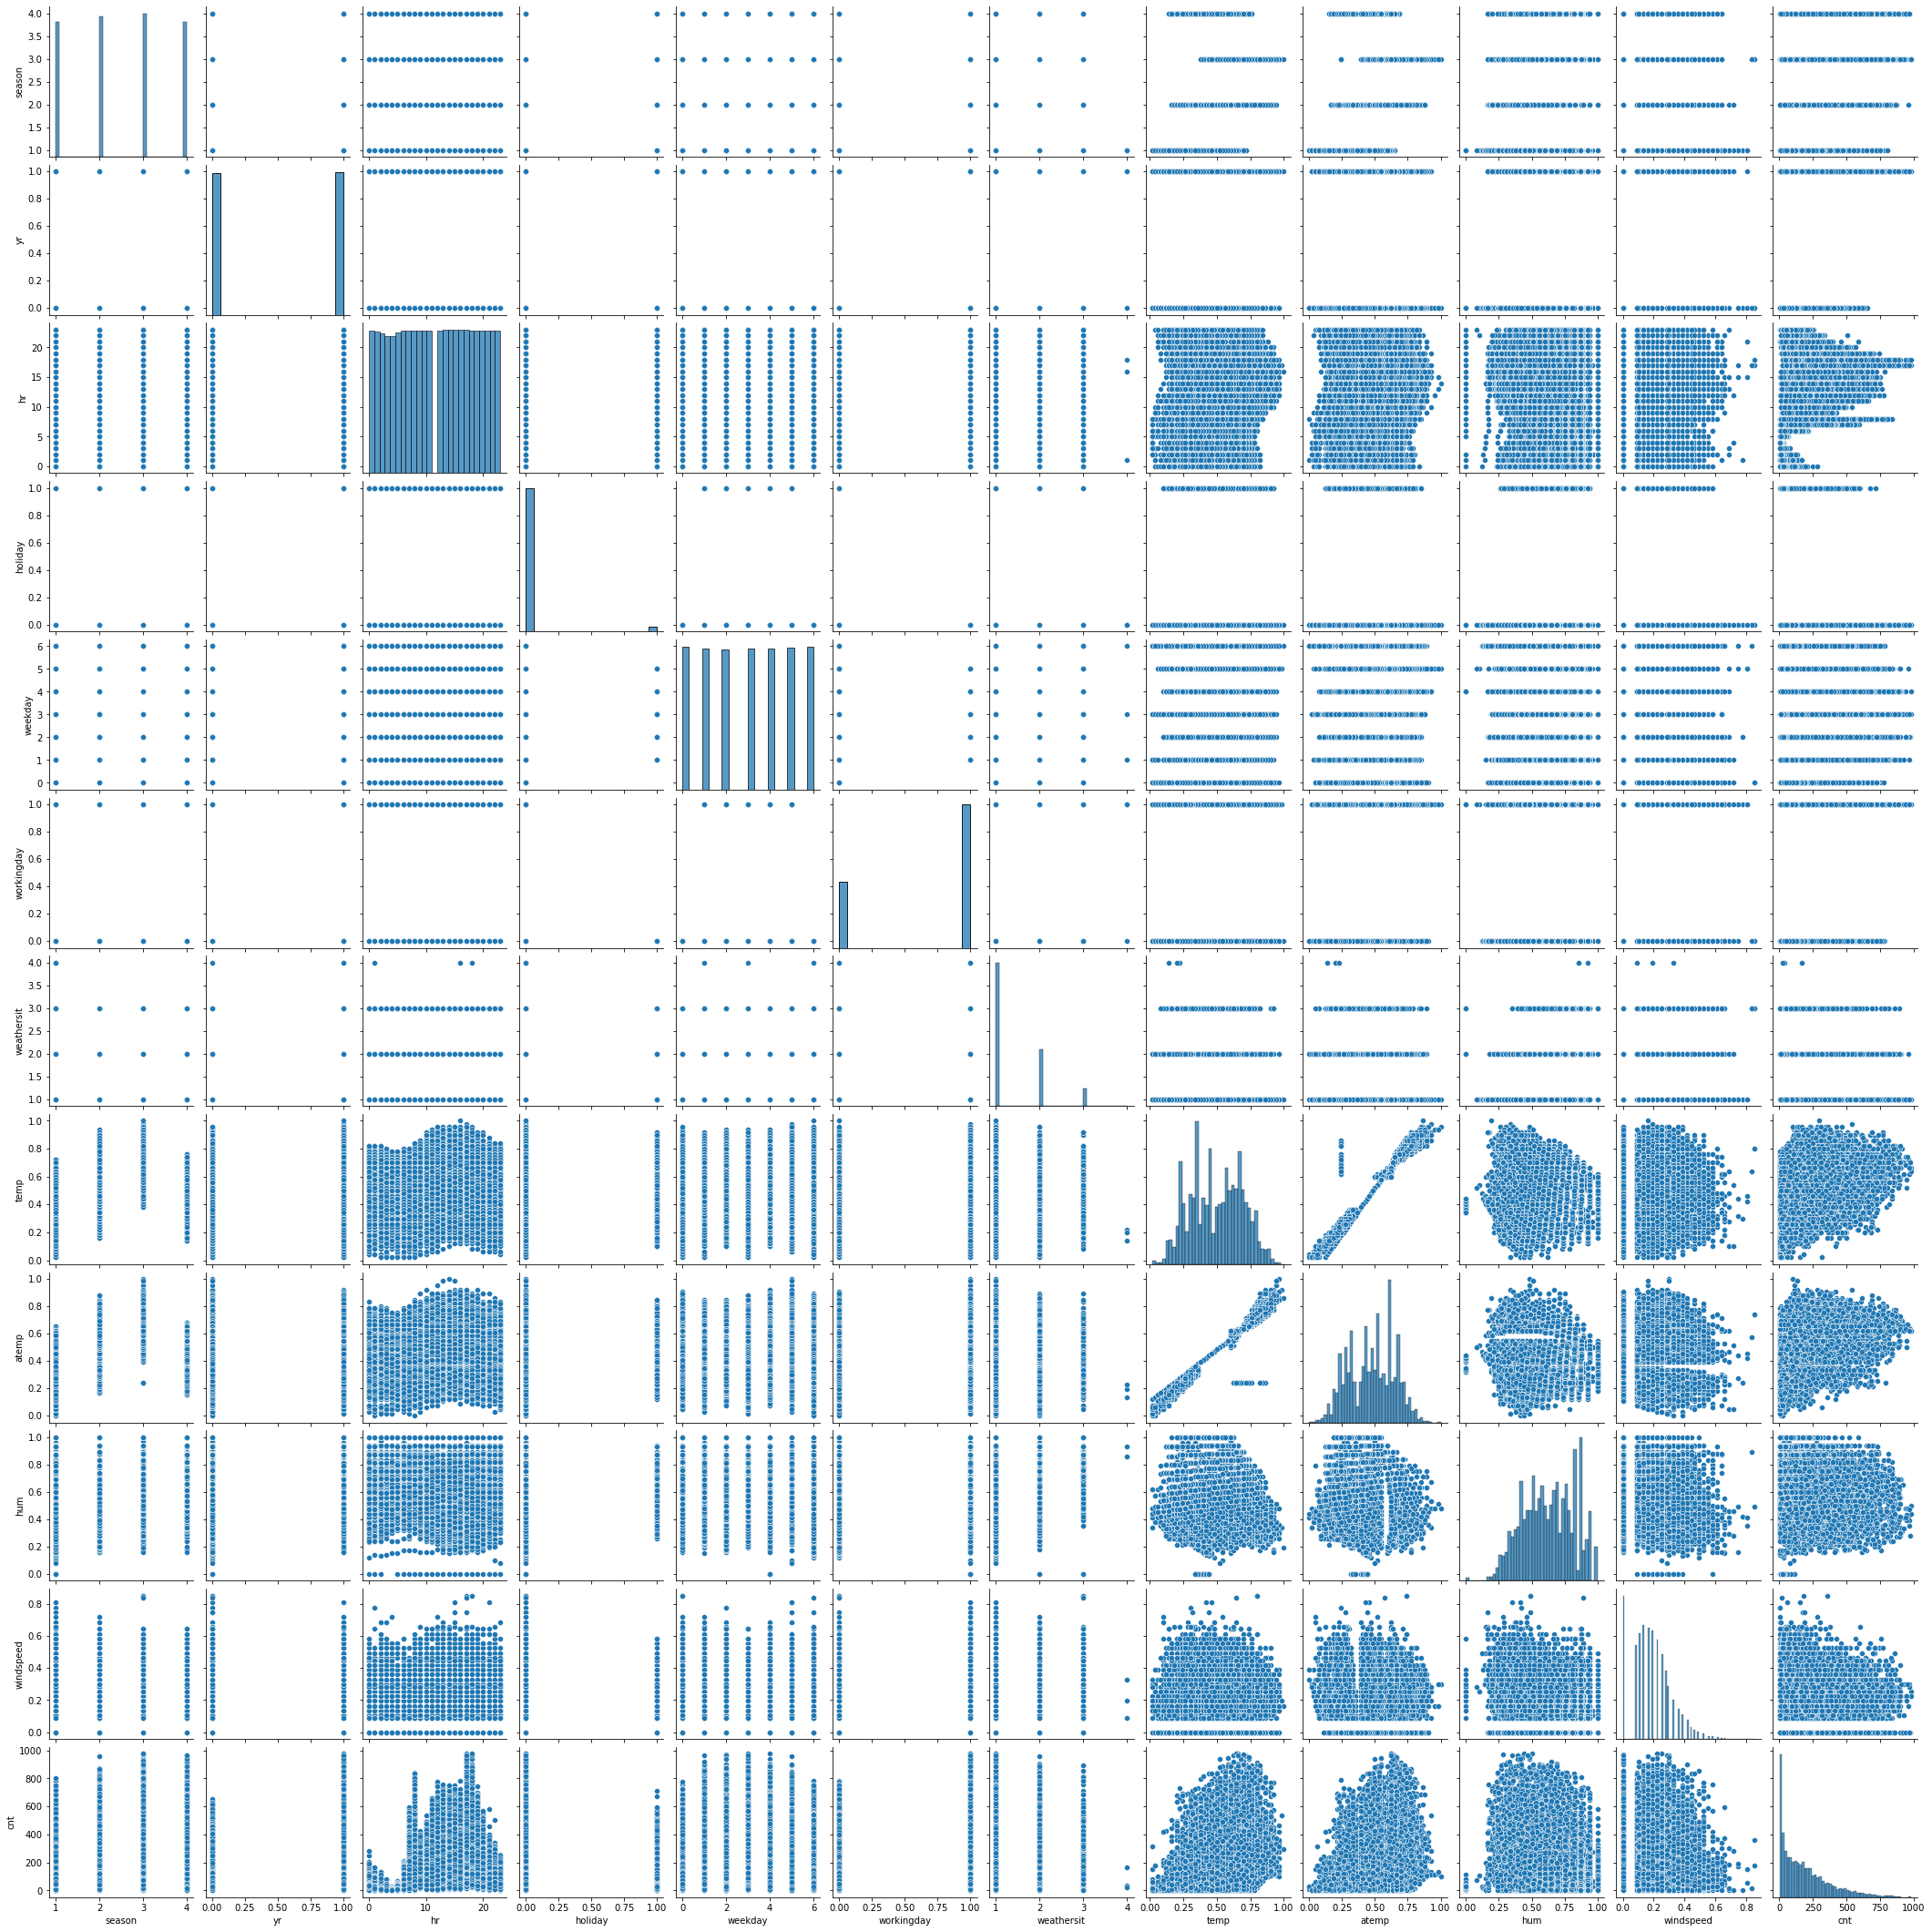

In [8]:
sns.pairplot(hour)

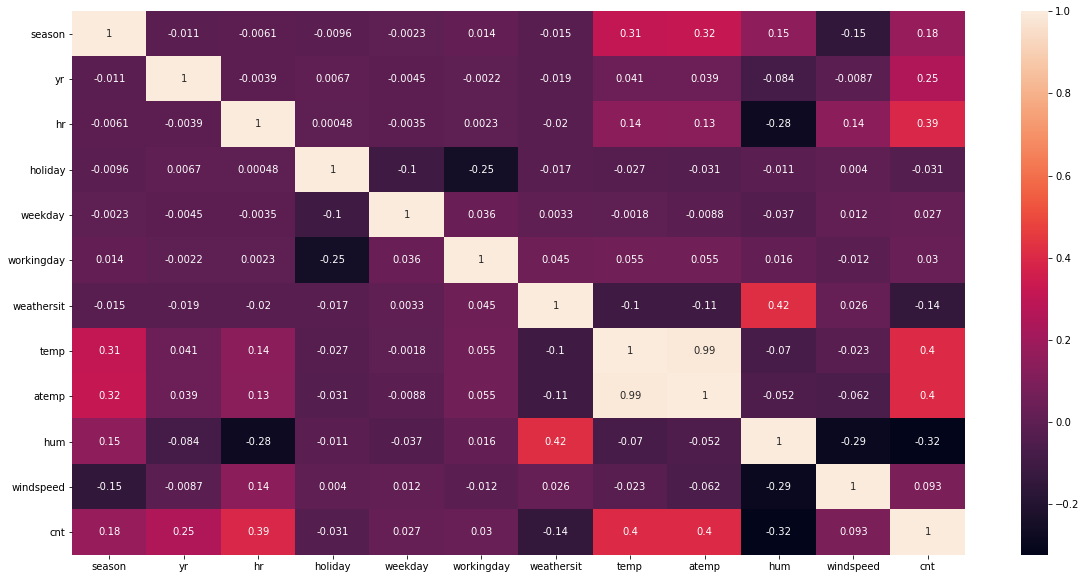

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data=hour.corr(),annot=True)
plt.show()

From above we can conclude that 
- temp and atemp is correlated to each other
- None of the column is Highly correlated with cnt so Linear Regression will not give good accuracy
- Rest, Data looks fine is ready for modeling

### Spliting the Train Test Data

In [10]:
X=hour.drop(['cnt','atemp'],axis=1)
y=hour['cnt']

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=100)

#### Creating Regressor and Grid Function

In [12]:
def Regressor(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    print('Training Score :',model.score(X_train,y_train))
    print('Testing Score :',model.score(X_test,y_test))
    y_pred = model.predict(X_test)
    print('MSE :',mean_squared_error(y_test, y_pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 Score :',r2_score(y_test, y_pred))
    plt.scatter(y_pred,y_test,alpha=0.5)
    


In [13]:
def Grid(model,X_train,y_train,X_test,y_test,para):
    model1=GridSearchCV(model, param_grid=para, n_jobs=-1,cv=5)
    Regressor(model1,X_train,X_test,y_train,y_test)
    print("Best Hyper Parameters:\n",model1.best_params_)

### Modeling

Using Decision Tree and RandomForest Regressor without and with Hyperparameter tuning and comparing them

#### Decision Tree Regressor

Training Score : 0.99996736247372
Testing Score : 0.8902503859675105
MSE : 3579.5689729574224
RMSE : 59.82949918691801
R2 Score : 0.8902503859675105


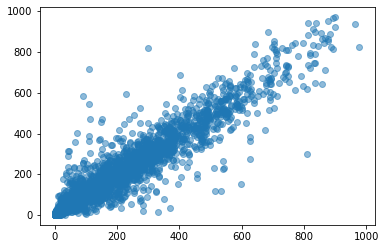

In [14]:
Dt_model=DecisionTreeRegressor()
Regressor(Dt_model,X_train,y_train,X_test,y_test)

#### Decision Tree Regressor with Hyperparamter tuning

Training Score : 0.9190748236901335
Testing Score : 0.9058617954975123
MSE : 3070.3907159734517
RMSE : 55.41110643159413
R2 Score : 0.9058617954975123
Best Hyper Parameters:
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 12, 'splitter': 'best'}


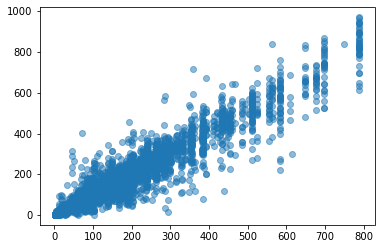

In [15]:
D_para = {
          'splitter':['best', 'random'],
          'max_depth': [4,5,6,7,8,9,10],
          'min_samples_split': [i for i in range(2,15,1)], 
          'min_samples_leaf':[i for i in range(2,15,1)]}
Grid(Dt_model,X_train,X_test,y_train,y_test,D_para)

#### RandomForest Regressor

Training Score : 0.991229591812545
Testing Score : 0.943127904371653
MSE : 1854.9276071078743
RMSE : 43.068870511169365
R2 Score : 0.943127904371653


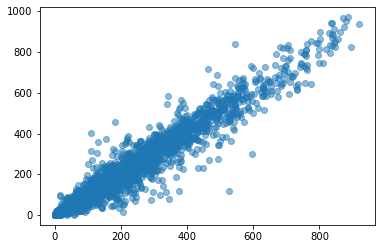

In [16]:
R_model= RandomForestRegressor()
Regressor(R_model,X_train,y_train,X_test,y_test)

#### RandomForest Regressor with hyperparameter tuning

Training Score : 0.9822060001452273
Testing Score : 0.9448128481177949
MSE : 1799.9718570759605
RMSE : 42.426075202355925
R2 Score : 0.9448128481177949
Best Hyper Parameters:
 {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 150, 'n_jobs': -1}


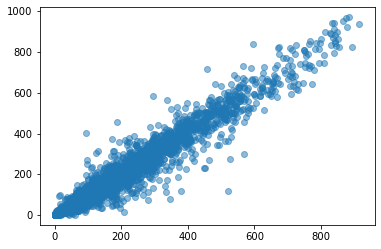

In [17]:
R_para = {
          'n_estimators':[25,50,75,100,125,150],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5,6,7],
         'n_jobs':[-1],
        }
Grid(R_model,X_train,X_test,y_train,y_test,R_para)

#### Finding Important features

In [22]:
final_model= RandomForestRegressor(min_samples_leaf= 2, min_samples_split= 3, n_estimators = 150, random_state=100,n_jobs= -1)
final_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=150,
                      n_jobs=-1, random_state=100)

<AxesSubplot:>

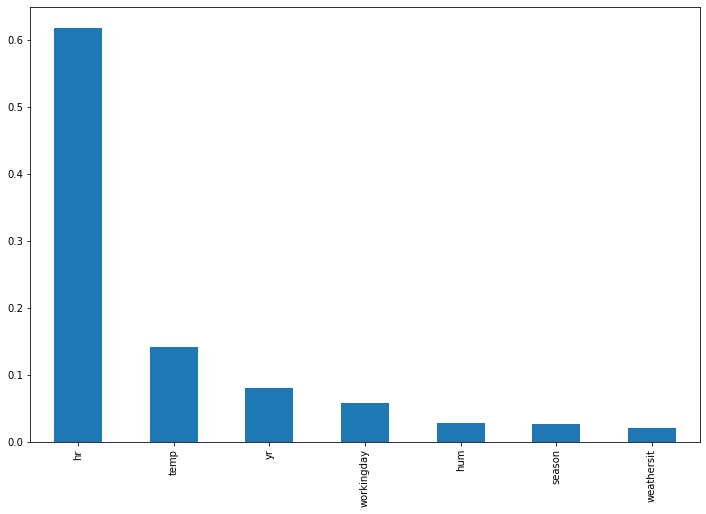

In [23]:
plt.figure(figsize=(12,8))
imp=pd.Series(final_model.feature_importances_,index=X.columns)
imp.nlargest(7).plot(kind='bar')

### Conclusion

By Comparing 4 models we come up with a best model which is RandomForest Regressor with
- MSE : 1799.97
- RMSE : 42.43
- R2 Score : 0.95
- Best Hyper Parameters:
 {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 150, 'n_jobs': -1}
 - hour is most important feature followed by temperature, year, working day